<a href="https://colab.research.google.com/github/awaisnazir08/MNIST-Image-Generation-using-Labels/blob/main/Using_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import tensorflow as tf


np.random.seed(0)

In [2]:
from keras.datasets import mnist

#loading the dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

#printing the shapes of the vectors
print('train_images: ' + str(train_images.shape))
print('train_labels: ' + str(train_labels.shape))
print('test_images:  '  + str(test_images.shape))
print('test_labels:  '  + str(test_labels.shape))

11490434/11490434 [==============================] - 0s 0us/step
train_images: (60000, 28, 28)
train_labels: (60000,)
test_images:  (10000, 28, 28)
test_labels:  (10000,)


In [3]:
print(type(train_images))

<class 'numpy.ndarray'>


In [4]:
# Preprocess training and test images
train_images = train_images.reshape((60000, 784))  # Flatten images (60000, 28, 28) -> (60000, 784)
train_images = train_images.astype('float32') / 255  # Normalize pixel values

test_images = test_images.reshape((10000, 784))  # Flatten images (10000, 28, 28) -> (10000, 784)

test_images = test_images.astype('float32') / 255  # Normalize pixel values

In [5]:
#printing the shapes of the vectors
print('train_images: ' + str(train_images.shape))
print('train_labels: ' + str(train_labels.shape))
print('test_images:  '  + str(test_images.shape))
print('test_labels:  '  + str(test_labels.shape))

train_images: (60000, 784)
train_labels: (60000,)
test_images:  (10000, 784)
test_labels:  (10000,)


In [6]:
train_labels=train_labels.reshape(60000,1)
test_labels = test_labels.reshape(10000,1)
print('train_labels: ' + str(train_labels.shape))
print('test_labels:  '  + str(test_labels.shape))

train_labels: (60000, 1)
test_labels:  (10000, 1)


In [7]:
print(type(train_images[4]))

<class 'numpy.ndarray'>


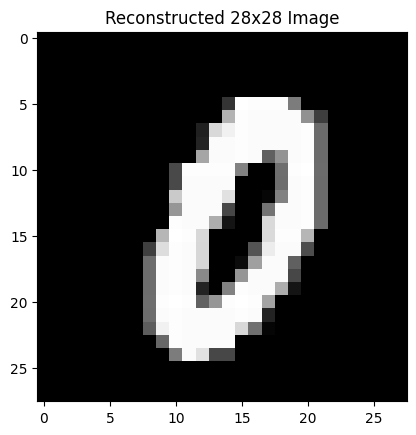

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Sample 28x28 image (you would replace this with your image data)
image_flattened = train_images[34]

# Reconstruct the image back into a 28x28 matrix
image_reconstructed = image_flattened.reshape(28, 28)

# Display the reconstructed image
plt.imshow(image_reconstructed, cmap='gray')
plt.title('Reconstructed 28x28 Image')
plt.show()



In [9]:
print(min(image_flattened))
print(max(image_flattened))
b0 = 0
b1 = 0
for element in image_flattened:
    if element == 0:
        b0 += 1
    else:
        b1 += 1
print(b0,b1)

0.0
1.0
601 183


In [10]:
print(train_labels)

[[5]
 [0]
 [4]
 ...
 [5]
 [6]
 [8]]


In [11]:
input_size = 1 # 28 * 28 = 784

hidden_size = 128  # Example: Using 128 neurons in the hidden layer

# Size of the output layer (number of output units)
output_size = 784  # 28 * 28 = 784 (output image size)

# Print the defined variables
print(f"Size of input layer: {input_size}")
print(f"Size of hidden layer: {hidden_size}")
print(f"Size of output layer: {output_size}")

Size of input layer: 1
Size of hidden layer: 128
Size of output layer: 784


In [ ]:
# Reshape train_images to (num_examples, 28, 28)
train_images2 = train_images.reshape(-1, 28, 28)

In [18]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Reshape
from tensorflow.keras.models import Sequential

# Normalize pixel values to range [0, 1]
# train_images = train_images / 255.0

# Define the TensorFlow model
model = Sequential([
    Dense(128, activation='relu', input_shape=(1,)),  # Input layer with 1 unit (for the label)
    Dense(256, activation='relu'),  # Hidden layer with 256 units and ReLU activation
    Dense(784, activation='sigmoid'),  # Output layer with 784 units (flattened image)
    Reshape((28, 28))  # Reshape output to 28x28 image
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               256       
                                                                 
 dense_4 (Dense)             (None, 256)               33024     
                                                                 
 dense_5 (Dense)             (None, 784)               201488    
                                                                 
 reshape_1 (Reshape)         (None, 28, 28)            0         
                                                                 
Total params: 234768 (917.06 KB)
Trainable params: 234768 (917.06 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [19]:
# Train the model
model.fit(train_labels, train_images2, epochs=10, batch_size=32)

Epoch 1/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2538 - accuracy: 0.0893
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2361 - accuracy: 0.1004
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2307 - accuracy: 0.1043
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2271 - accuracy: 0.1055
Epoch 5/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.2255 - accuracy: 0.1057
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2247 - accuracy: 0.1055
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2241 - accuracy: 0.1057
Epoch 8/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2231 - accuracy: 0.1063
Epoch 9/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2222 - accuracy: 0.1076
Epoch 10/10
1875/1875 [==============================] - 10s 5ms/step - l

1875/1875 [==============================] - 6s 3ms/step - loss: 0.2218 - accuracy: 0.1099
Model Accuracy: 10.99%


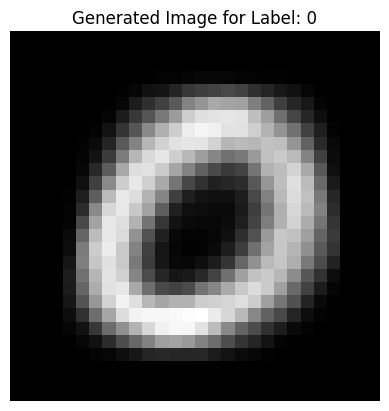

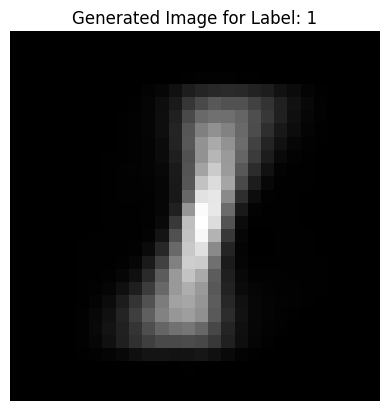

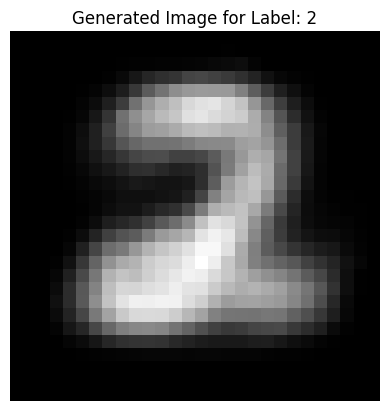

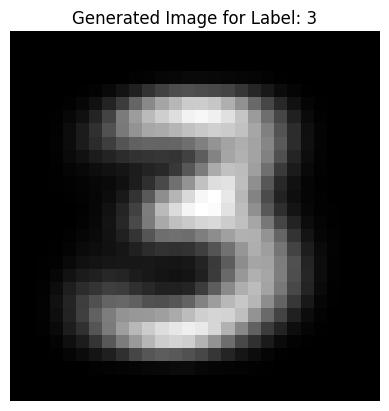

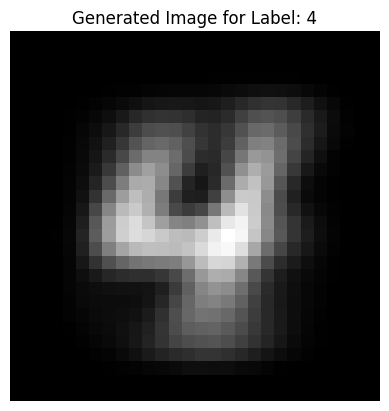

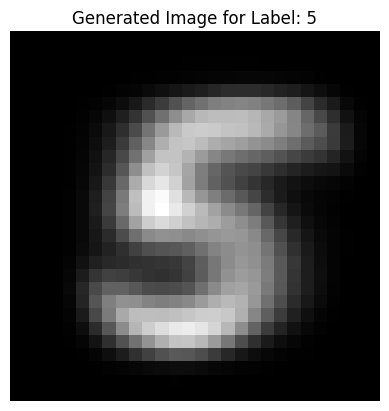

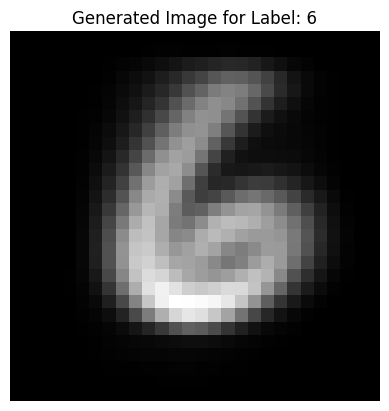

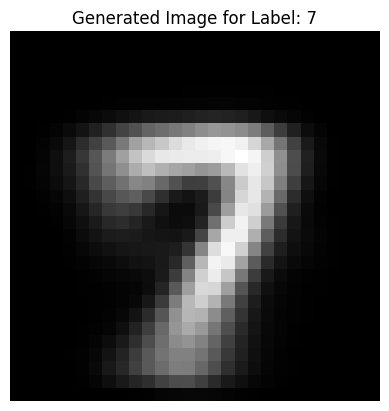

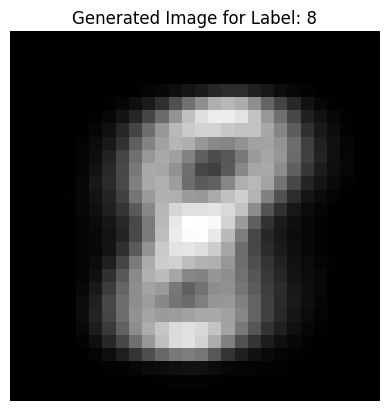

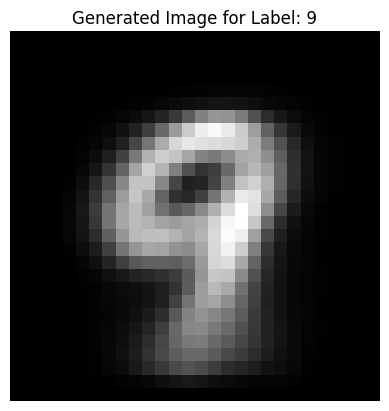

In [21]:
# Evaluate the model
loss, accuracy = model.evaluate(train_labels, train_images2)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

# Generate and visualize images for specific labels
import matplotlib.pyplot as plt

def generate_and_visualize_images(label):
    # Convert label to numpy array with shape (1,)
    label = tf.convert_to_tensor([[label]], dtype=tf.float32)
    # Generate image using the trained model
    generated_image = model(label)
    # Reshape the generated image to 28x28
    generated_image = generated_image.numpy().reshape(28, 28)

    # Plot the generated image
    plt.figure()
    plt.imshow(generated_image, cmap='gray')
    plt.title(f'Generated Image for Label: {int(label[0,0])}')
    plt.axis('off')
    plt.show()

# Example: Generate and visualize images for labels 0 to 9
for label in range(10):
    generate_and_visualize_images(label)


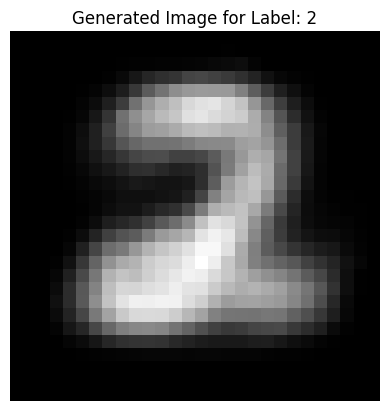

In [24]:
generate_and_visualize_images(2)
